In [4]:
import os 
current = os.getcwd()
os.chdir('C:\\Users\\lucas\\Documents\\Luc_DOCS\\IMDEA\\GraphMaterials')
os.getcwd()

'C:\\Users\\lucas\\Documents\\Luc_DOCS\\IMDEA\\GraphMaterials'

In [5]:
import networkx as nx
from pymatgen.core.structure import Structure

from GraphFunc.ZeoDataframeFunction import ZeoDataframe
from GraphFunc.ConexionFunction import Conexion
from pymatgen.io.cif import CifWriter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from copy import deepcopy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from networkx.relabel import relabel_nodes
from pymatgen.core.structure import Structure
import math
import itertools
from itertools import combinations, combinations_with_replacement

In [475]:
for cif_name in os.listdir('.\\CifFiles\\'):
    (cif_name.split('.')[0])

In [392]:
name = 'EDI'
path_nt2 = './Nt2Files/' + name + '.nt2'
stu = Structure.from_file('./CifFiles/' + name + '.cif')

# Here, we have the lattice vector of the structure we want to apply PageRank algorithm
# We will use the point of applicattion of the lattice vector of the cell to locate them in space 
# once we put multiple cells togehter


# We take coodinates of the vectors A, B and C
stu.lattice

# Dimensions of the cell
box = np.array([stu.lattice.abc[0], stu.lattice.abc[1], stu.lattice.abc[2]])

# Angles of the cell's axis
alpha = stu.lattice.alpha
beta = stu.lattice.beta
gamma = stu.lattice.gamma

# Constant to change from degrees to radians
cte = math.pi/180

# Vectors proyections of the cell's vector over the ortogonal axis
x_axis = stu.lattice.a
y_axis = stu.lattice.b
z_axis = stu.lattice.c

# Cell's vectors
a, b, c = round(x_axis*math.sin(beta*cte), 3) , 0 ,round(x_axis*math.cos(beta*cte), 3)
d, e, f = round(y_axis*math.cos(gamma*cte), 3) ,round(y_axis*math.sin(gamma*cte), 3), 0
l, m, n = 0, round(z_axis*math.cos(alpha*cte), 3), round(z_axis*math.sin(alpha*cte), 3)

In [393]:
# Cell's vectors
print(a, b, c )
print(d, e, f )
l, m, n

6.926 0 0.0
0.0 6.926 0


(0, 0.0, 6.41)

In [394]:
# Constant that limits the maximum number of cells that could expand over every direction 
# (axis and diagonal direction)
r = 1
        
cubic_comb = []

# Each of the cell's vectors represent the length of the cell in that direction.
# Independently of which length it is if you multiply the length of one of the vector by two it is clear
# that the result vector will give the information about the location of the second cell in the direction
# of the vector we multiply by two.

# We generate the location of the cells for a cube of length equals to len(range(-r, r + 1))
# r = 1, len(range(-r, r + 1)) = 27
# The information of location of the cells are saved in real coordinates using the combination of the 
# cell's vectors and in an orthogonal base transformation using as vectors the numbers (i,j,k) we use to multiply 
# the cell's vectors
for i in range(-r, r+1):
    for j in range(-r, r+1):
        for k in range(-r, r+1):
            cubic_comb.append((np.array([a,b,c])*i + np.array([d,e,f])*j + np.array([l,m,n])*k,
                               np.array([i,j,k])))



vector_pos = []
vector_ort = []
# Unpack values
# We also choose as a center the vector 0 
lattice_vector = stu.lattice
print('This is the Lattice vector: {}'.format(lattice_vector.abc))

for vec, ort in cubic_comb:
    vector_pos.append(list(vec))
    vector_ort.append(list(ort))

# From the vector 0 we create a sphere of radius = radius_sphere
# We append all the cell that fell into the sphere
# radius_sphere = max(lattice_vector.abc)#np.sqrt(np.sqrt(stu.lattice.a**2 + stu.lattice.b**2)**2 + stu.lattice.c**2)
# for vec, ort in cubic_comb:
#     dist_origin = np.sqrt(np.sum(np.power(vec, 2)))
#     if dist_origin <= radius_sphere:
#         if list(vec) in vector_pos:
#             pass
#         else:
#             vector_pos.append(list(vec))
#             vector_ort.append(list(ort))
#     else:
#         pass
    
len(vector_pos)

This is the Lattice vector: (6.926, 6.926, 6.41)


27

In [395]:
vector_ort # = vector_ort-np.array([1,1,1])

[[-1, -1, -1],
 [-1, -1, 0],
 [-1, -1, 1],
 [-1, 0, -1],
 [-1, 0, 0],
 [-1, 0, 1],
 [-1, 1, -1],
 [-1, 1, 0],
 [-1, 1, 1],
 [0, -1, -1],
 [0, -1, 0],
 [0, -1, 1],
 [0, 0, -1],
 [0, 0, 0],
 [0, 0, 1],
 [0, 1, -1],
 [0, 1, 0],
 [0, 1, 1],
 [1, -1, -1],
 [1, -1, 0],
 [1, -1, 1],
 [1, 0, -1],
 [1, 0, 0],
 [1, 0, 1],
 [1, 1, -1],
 [1, 1, 0],
 [1, 1, 1]]

In [396]:
vector_pos # = vector_pos-box

[[-6.926, -6.926, -6.41],
 [-6.926, -6.926, 0.0],
 [-6.926, -6.926, 6.41],
 [-6.926, 0.0, -6.41],
 [-6.926, 0.0, 0.0],
 [-6.926, 0.0, 6.41],
 [-6.926, 6.926, -6.41],
 [-6.926, 6.926, 0.0],
 [-6.926, 6.926, 6.41],
 [0.0, -6.926, -6.41],
 [0.0, -6.926, 0.0],
 [0.0, -6.926, 6.41],
 [0.0, 0.0, -6.41],
 [0.0, 0.0, 0.0],
 [0.0, 0.0, 6.41],
 [0.0, 6.926, -6.41],
 [0.0, 6.926, 0.0],
 [0.0, 6.926, 6.41],
 [6.926, -6.926, -6.41],
 [6.926, -6.926, 0.0],
 [6.926, -6.926, 6.41],
 [6.926, 0.0, -6.41],
 [6.926, 0.0, 0.0],
 [6.926, 0.0, 6.41],
 [6.926, 6.926, -6.41],
 [6.926, 6.926, 0.0],
 [6.926, 6.926, 6.41]]

In [397]:
# Later in this Notebook we are going to create a graph for every vector we generated in the previous step.
# These graphs will be composed by nodes whose names will be an ordered number.
# The names will be assigned by the order the graphs were generated.
# That means every graph will have as the name of their nodes a range of numbers whose length will be equal 
# to the name of the last node we create in the first graph.
# In order to keep track of the order we create we are going to establish that order by numbered the orthogonal
# vectors

pos_order = {}
i = 0
for vector in vector_ort:
    name = str(vector[0]) + str(vector[1]) + str(vector[2]) 
    pos_order[name] = i
    i += 1
    

six_faces_neigh = [np.array([1,0,0]), np.array([-1, 0,0]), np.array([0,1,0]), 
          np.array([0,-1,0]), np.array([0,0,1]), np.array([0,0,-1])]

In [398]:
pos_order

{'-1-1-1': 0,
 '-1-10': 1,
 '-1-11': 2,
 '-10-1': 3,
 '-100': 4,
 '-101': 5,
 '-11-1': 6,
 '-110': 7,
 '-111': 8,
 '0-1-1': 9,
 '0-10': 10,
 '0-11': 11,
 '00-1': 12,
 '000': 13,
 '001': 14,
 '01-1': 15,
 '010': 16,
 '011': 17,
 '1-1-1': 18,
 '1-10': 19,
 '1-11': 20,
 '10-1': 21,
 '100': 22,
 '101': 23,
 '11-1': 24,
 '110': 25,
 '111': 26}

In [399]:
# Initialize a networkx's graph. 
# We take the information about the nodes and edges from the .nt2 file and passes it out to the graph.

# Every node in the graph will have three attributes.
# -Cartesian coordinate
# -Pagerank coefficient
# -Radius of the maximus sphere that fit in that node

# Evey edge will have one attribute:
# -Radius of the maximus sphere that can travel through the edge

# We are not going to save the information about edges that connect point from outside of the cell

G = nx.Graph()

pagerank_init_value = 100
with open(path_nt2) as f:
    line = ' '

    while line:
        line = f.readline()

        if line == 'Vertex table:\n':
            
            while line:

                line = f.readline()
                
                if line == '\n':
                    break
                else:
                    line_list = line.split()
                    key = int(line_list[0])
                    coord_x = float(line_list[1])
                    coord_y = float(line_list[2])
                    coord_z = float(line_list[3])
                    min_dist_atom = float(line_list[4])
        
                    G.add_node(key, coord=np.array([coord_x, coord_y, coord_z]), rad_max_sph=min_dist_atom,
                              pagerank=pagerank_init_value)

    #                 vertex_table = vertex_table.append({'coord_x':coord_x, 'coord_y':coord_y, 'coord_z':coord_z,
    #                                                     'min_dist_atom':min_dist_atom, 'key':key},ignore_index = True)


        x_1 = len(list(range(0,(sorted(list(G.nodes), reverse=True)[0] + 1))))
        
        
        
        if line == 'Edge table:\n':
            

            while line:

                line = f.readline()
                if line == '':
                    break
                line_list = line.split()
                origin = int(line_list[0])
                destination = int(line_list[2])
                larger_radius = float(line_list[3])
                x_sim = int(line_list[4])
                y_sim = int(line_list[5])
                z_sim = int(line_list[6])
                if x_sim == 8:
                    G.add_node(destination + x_1, coord=G.nodes[destination]['coord'] + np.array([box[0], 0, 0]),
                               rad_max_sph=G.nodes[destination]['rad_max_sph'], pagerank=pagerank_init_value)
                    
                    G.add_edge(origin, destination + x_1, rad_max_sph=larger_radius)
                    print(destination + x_1)
                else:
                    if sum([abs(x_sim), abs(y_sim), abs(z_sim)]) == 0:
                        G.add_edge(origin, destination, rad_max_sph=larger_radius)
                        
                    else:
                        pass

In [481]:
print( sorted(G.nodes)[-1])
total_nodes_G = len(G.nodes)
larger_dist_atom = []
for i in G.nodes:
    larger_dist_atom.append(G.nodes[i]['rad_max_sph'])
    
np.argmax(larger_dist_atom)
G.nodes[7]

69


{'coord': array([3.463, 3.463, 3.205]),
 'rad_max_sph': 2.65996,
 'pagerank': 100}

In [ ]:
# We didn't save the connection between nodes of different cells before  we are going to save it right now 
# but in a dictionary
# The information will be stored in six lists since the cell has six faces. In each list will contains the
# connections between the nodes that go through that specific face.

conx_cell = {}
x_1 = []
x_minus_1 = []
y_1 = []
y_minus_1 = []
z_1 = []
z_minus_1 = []
with open(path_nt2) as f:
    line = ' '

    while line:
        line = f.readline()
        
        if line == 'Edge table:\n':
            while line:

                line = f.readline()
                
                if line == '':
                    break
                    
                line_list = line.split()
                origin = int(line_list[0])
                destination = int(line_list[2])
                larger_radius = float(line_list[3])
                x_sim = int(line_list[4])
                y_sim = int(line_list[5])
                z_sim = int(line_list[6])
                if sum([abs(x_sim), abs(y_sim), abs(z_sim)]) == 0:
                    pass
                else:
                    if x_sim == 1:
                        x_1.append((origin,destination,larger_radius))
                        
                        print(origin,destination)
                    elif x_sim == -1:
                         x_minus_1.append((origin,destination,larger_radius))
                    elif y_sim == 1:
                         y_1.append((origin,destination,larger_radius))
                    elif y_sim == -1:
                         y_minus_1.append((origin,destination,larger_radius))
                    elif z_sim == 1:
                         z_1.append((origin,destination,larger_radius))
                    elif z_sim == -1:
                         z_minus_1.append((origin,destination,larger_radius))
                    else:
                        print('outside of one cell radius')

                        

conx_cell['100'] = x_1
conx_cell['-100'] = x_minus_1
conx_cell['010'] = y_1
conx_cell['0-10'] = y_minus_1
conx_cell['001'] = z_1
conx_cell['00-1'] = z_minus_1

In [401]:
# for vector in six_faces_neigh:
#     name = str(vector[0]) + str(vector[1]) +str(vector[2]) 
#     print(name)



In [402]:
# Create a dictionary which contains one graph for every cell we want to use to calculate the 
# pagerank coefficients. 
# These new graphs are a copy of the one that we initialized in previous step so, we 
# change the names and the cartesian coordinates for every node

graph_mod= {}

# As we mentioned earlier we are goint to name the nodes wit a number.
# The name of the last node of the first graph plus one (because we start in 0) will give as the range in every 
# graph.

key_plus = sorted(list(G.nodes), reverse=True)[0] + 1

# The names used as keys in the dictionary of graph are the ortogonal base transformations we calculated before
# They names are very useful to know the position of the graph with respect to the origin (0,0,0).

for i in range(len(vector_pos)):
    name = str(vector_ort[i][0])+str(vector_ort[i][1])+str(vector_ort[i][2])
    graph_mod[name] = deepcopy(G)
    
    mapping_name = {}
    multiplier = pos_order[name]
    for node in graph_mod[name].nodes:
        graph_mod[name].nodes[node]['coord'] += vector_pos[i] #*box
        mapping_name[node] = node + key_plus*multiplier
    relabel_nodes(graph_mod[name], mapping=mapping_name, copy=False)

# As you can see here it is really to see where the graph is if we now their name
print('Keys of the Dictionary of Graph: {}'.format(graph_mod.keys()))
    
    
# List with the names of the graph
cell_list = list(graph_mod.keys())

# Now we add to the graph the edges that connect with nodes outside of the cell. We do this for every graph 
# in the dictionary

for j in range(len(vector_pos)):
    for neighbor in six_faces_neigh:
        str_neighbor = str(neighbor[0]) + str(neighbor[1]) + str(neighbor[2]) 
        
        neig_loc = vector_ort[j] + neighbor
        str_neig_loc = str(neig_loc[0])+str(neig_loc[1])+str(neig_loc[2])
        
        if str_neig_loc in cell_list:
            name = str(vector_ort[j][0])+str(vector_ort[j][1])+str(vector_ort[j][2])
            multiplier_origin = pos_order[name]
            multiplier_destination = pos_order[str_neig_loc]
            
            for edge in conx_cell[str_neighbor]:
                edge_1 = edge[0] + multiplier_origin*key_plus
                edge_2 = edge[1] + multiplier_destination*key_plus
                rad_max_sph = edge[2]
                graph_mod[name].add_edge(edge_1, edge_2)
                graph_mod[name].edges[edge_1, edge_2]['rad_max_sph'] = rad_max_sph
            
            
# for key in graph_mod:
#     print(key, len(graph_mod[key].nodes))

Keys of the Dictionary of Graph: dict_keys(['-1-1-1', '-1-10', '-1-11', '-10-1', '-100', '-101', '-11-1', '-110', '-111', '0-1-1', '0-10', '0-11', '00-1', '000', '001', '01-1', '010', '011', '1-1-1', '1-10', '1-11', '10-1', '100', '101', '11-1', '110', '111'])


In [483]:
list(graph_mod['000'].nodes)

[910,
 911,
 912,
 913,
 914,
 915,
 916,
 917,
 918,
 919,
 920,
 921,
 922,
 923,
 924,
 925,
 926,
 927,
 928,
 929,
 930,
 931,
 932,
 933,
 934,
 935,
 936,
 937,
 938,
 939,
 940,
 942,
 943,
 944,
 945,
 946,
 947,
 948,
 949,
 950,
 951,
 952,
 953,
 954,
 955,
 956,
 957,
 958,
 959,
 960,
 961,
 962,
 963,
 964,
 965,
 966,
 967,
 968,
 969,
 970,
 971,
 972,
 973,
 974,
 975,
 976,
 977,
 978,
 979,
 1569,
 1572,
 1568,
 1564,
 1560,
 1599,
 1603,
 1607,
 1608,
 1609,
 335,
 330,
 329,
 310,
 313,
 345,
 346,
 347,
 348,
 349,
 1125,
 1122,
 1134,
 1135,
 1137,
 1154,
 1167,
 1160,
 1162,
 1177,
 706,
 705,
 714,
 716,
 718,
 735,
 740,
 748,
 737,
 756,
 1001,
 1005,
 1004,
 1030,
 1008,
 1029,
 1031,
 1039,
 1045,
 842,
 866,
 846,
 862,
 857,
 858,
 882,
 888,
 902]

In [ ]:
x_list = []
x_minus_list = []
y_list = []
y_minus_list = []
z_list = []
z_minus_list = []

allcells = list(graph_mod.keys())

for i in range(-r, r+1):
    for j in range(-r, r+1):
        for k in range(-r, r+1):
            if abs(i) == r:
                if i == r:
                    x_list.append(str(i)+str(j)+str(k))
                else:
                    x_minus_list.append(str(i)+str(j)+str(k))
            if abs(j) == r:
                if j == r:
                    y_list.append(str(i)+str(j)+str(k))
                else:
                    y_minus_list.append(str(i)+str(j)+str(k))
            if abs(k) == r:
                if k == r:
                    z_list.append(str(i)+str(j)+str(k))
                else:
                    z_minus_list.append(str(i)+str(j)+str(k))
print(x_list)
print(x_minus_list)
print('------')
print(y_list)
print(y_minus_list)
print('------')
print(z_list)
print(z_minus_list)

In [404]:
for k in range(len(x_list)):
    name_origin_x = x_list[k]
    name_destination_x = x_minus_list[k]
    
    name_origin_y = y_list[k]
    name_destination_y = y_minus_list[k]
    
    name_origin_z = z_list[k]
    name_destination_z = z_minus_list[k]
    
    multiplier_origin_x = pos_order[name_origin_x]
    multiplier_destination_x = pos_order[name_destination_x]
    
    multiplier_origin_y = pos_order[name_origin_y]
    multiplier_destination_y = pos_order[name_destination_y]
    
    multiplier_origin_z = pos_order[name_origin_z]
    multiplier_destination_z = pos_order[name_destination_z]
    
    for edge in conx_cell['100']:
        edge_1 = edge[0] + multiplier_origin_x*key_plus
        edge_2 = edge[1] + multiplier_destination_x*key_plus
        rad_max_sph = edge[2]
        graph_mod[name_origin_x].add_edge(edge_1, edge_2)
        graph_mod[name_origin_x].edges[edge_1, edge_2]['rad_max_sph'] = rad_max_sph
        
#         print(name_origin_x, name_destination_x)
#         print(edge_1, edge_2)
#         print(edge[0], edge[1])
#         print('_____________')
        
    for edge in conx_cell['010']:
        edge_1 = edge[0] + multiplier_origin_y*key_plus
        edge_2 = edge[1] + multiplier_destination_y*key_plus
        rad_max_sph = edge[2]
        graph_mod[name_origin_y].add_edge(edge_1, edge_2)
        graph_mod[name_origin_y].edges[edge_1, edge_2]['rad_max_sph'] = rad_max_sph
        
    for edge in conx_cell['001']:
        edge_1 = edge[0] + multiplier_origin_z*key_plus
        edge_2 = edge[1] + multiplier_destination_z*key_plus
        rad_max_sph = edge[2]
        graph_mod[name_origin_z].add_edge(edge_1, edge_2)
        graph_mod[name_origin_z].edges[edge_1, edge_2]['rad_max_sph'] = rad_max_sph

In [477]:
# for key in graph_mod:
#     print(key, len(graph_mod[key].nodes))

In [408]:
# Here, we create a final graph and we store in it the information of all the nodes and edges of the ones
# we generate in the previous step
final = nx.Graph()

for key in graph_mod:
    final.add_nodes_from(graph_mod[key])
    final.add_edges_from(graph_mod[key].edges)
    for node in graph_mod[key].nodes:
        for attr in graph_mod[key].nodes[node]:
            final.nodes[node][attr] = graph_mod[key].nodes[node][attr]
        
    for edge in graph_mod[key].edges:
        for attr in graph_mod[key].edges[edge[0], edge[1]]:
            final.edges[edge][attr] = graph_mod[key].edges[edge][attr] 
  

In [409]:
final.nodes[0]

{'coord': array([-6.015554, -4.82989 , -4.44114 ]),
 'rad_max_sph': 0.498201,
 'pagerank': 100}

In [410]:
# We calculate the neighbors for every node in the graph
neigh_dic = {}
for n, nbrs in final.adj.items():
    neigh = []
    for nbr, eattr in nbrs.items():
        neigh.append(nbr)
        
        
    neigh_dic[str(n)] = neigh

In [411]:
# For every node we calculate the sum of the square radius of their edges
sum_radius = {}
for node in final.nodes:
    
    sum_edges = 0
    for nei in neigh_dic[str(node)]:
        
        score = final[node][nei]['rad_max_sph']
        sum_edges += score**2
    sum_radius[str(node)] = sum_edges

In [412]:
#  conexion is a dictionary that saves information of the weights that every edge has in 
# relationship with the total number of edges in the node.
# Every edge has a radius as attribute so we are using the proportion of the square of the radius divide by
# the sum of the square radius in the node

conexion = {}
sub = {}
for node in final.nodes:
    
    sub = {}
    for nei in neigh_dic[str(node)]:
        radius_node = final[node][nei]['rad_max_sph']
        all_radius = sum_radius[str(nei)] 
        sub[str(nei)] = radius_node**2/all_radius
    conexion[str(node)] = sub
       

In [413]:
# for node in final.nodes:
#     print(sum(conexion[str(node)].values()))

In [414]:
# sum_edges = 0
# for nei in neigh_dic['0']:
#     print(nei)
#     score = final[0][nei]['rad_max_sph']
#     sum_edges += score
# sum_edges
sum((np.array([1,2,3,6,5,4,6,5,6,5,88,5,2,6,5,6,6])*533/161))

532.9999999999999

In [415]:
def unit_sum(pagerank_list):
    return pagerank_list/sum(pagerank_list)

unit_sum(np.array([1,2,3,6,5,4,6,5,6,5,8888888888888888888888888888888888888888888,5,2,6,5,6,6]))[0]

1.125e-43

In [416]:
def unit_sum(pagerank_list):
    return pagerank_list/sum(pagerank_list)

# Loop over the number of iterations we want to run pagerank
def pagerank(graph, iteration, conexion, neigh_dic):
    node_list = sorted(list(graph.nodes))
    for i in range(iteration):
        pagerank_list = pagerank_one_iter(graph, conexion, neigh_dic, node_list)
    return pagerank_list
    
# Loop over the nodes of the graph
def pagerank_one_iter(graph, conexion, neigh_dic, node_list):
    for selfnode in node_list:
        update_pagerank(selfnode, conexion, neigh_dic, graph)
    pagerank_list = np.asarray([graph.nodes[node]['pagerank'] for node in node_list], dtype='float32')
    return unit_sum(pagerank_list)

# Update of the nodes attribute pagerank following the rule we describe in connections
def update_pagerank(selfnode, conexion, neigh_dic, graph):
    in_neighbors = neigh_dic[str(selfnode)] #self.parents
    pagerank_sum = sum(graph.nodes[node]['pagerank']*conexion[str(selfnode)][str(node)]
                       for node in in_neighbors)
    graph.nodes[selfnode]['pagerank'] = pagerank_sum
    
    
info = pagerank(final, 1, conexion, neigh_dic)

In [417]:
print(len(info))
info[np.argsort(info)[-1:-len(vector_pos)-1:-1]]
print(sum(info), len(info)*100)

1863
0.9999999790052243 186300


In [418]:
print(len(info))
info[np.argsort(info)[-1:-len(vector_pos)-1:-1]]
print(sum(info), len(info)*100)

1863
0.9999999790052243 186300


In [426]:
limit

NameError: name 'limit' is not defined

<IPython.core.display.Javascript object>


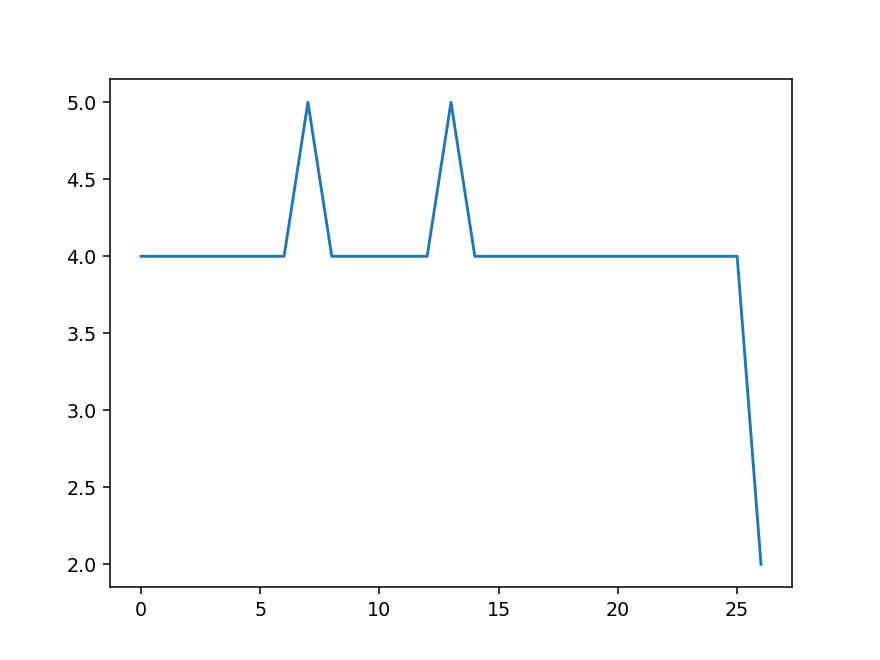

In [467]:
histo_dist = {}
random_list = list(range(27))
for i in range(27):
    histo_dist[str(i)] = []
# trial_dic = {'EDI':}

limit = round(key_plus*0.05)*27
string = ''
for ele in sorted(np.floor(np.argsort(info)[-1:-limit-1:-1]/key_plus)):
    histo_dist[str(int(ele))].append(int(ele))
    
    
edi_dist = []

for key in histo_dist:
    edi_dist.append(len(histo_dist[key]))
    
   
    
figure, axis = plt.subplots(1,1)

axis.plot(random_list, edi_dist)

In [441]:
np.argsort(info)[-1:-limit-1:-1]

array([ 145, 1387,  628, 1111,  214, 1456,  904, 1042,  559, 1732, 1180,
       1663,  766, 1318,  973,  283, 1801,  490, 1525, 1594,  835, 1249,
        697,    7,   76,  421,  352,  801,  387,  318,  870, 1353, 1698,
        732, 1077,  663,  456, 1422,  249,  525, 1215, 1491,  180, 1836,
       1284,  939, 1146, 1767, 1008,   42, 1560,  111,  594, 1629, 1853,
       1232,  611, 1784, 1163,  473, 1094,  542, 1715, 1025,  404, 1439,
        197, 1646,  818, 1301,  128,   59,  266,  680,  887,  956, 1577,
       1370,  335, 1508,  749, 1807, 1186,  565, 1048, 1117, 1669, 1738,
        427,  496, 1600,  979,  772,  358, 1393,  151,  289, 1324, 1531,
        634,  703,   82, 1462,  910, 1255,  220,   13,  841], dtype=int64)

In [419]:
mat_dic = {}
# for graph_name in graph_mod.keys():
#     print(pos_order[graph_name])



In [420]:
info[:70]*10000

array([ 3.1065004 ,  8.907806  ,  7.8454123 ,  8.907806  ,  4.936277  ,
        4.823635  ,  7.2331414 , 13.322278  ,  9.763217  ,  3.1638603 ,
        4.0417147 ,  4.6709256 ,  4.8412004 , 10.493439  ,  6.995935  ,
        6.307071  ,  6.254578  ,  5.5192995 ,  5.3625245 ,  3.072733  ,
        6.060602  ,  5.1471334 ,  5.347241  ,  9.902837  ,  4.8164577 ,
        6.6766653 ,  5.2281847 ,  3.0940456 ,  7.6961465 ,  3.090092  ,
        0.6616841 ,  3.067035  ,  0.6616841 ,  0.5308737 ,  3.3179033 ,
        4.686934  ,  6.3922167 ,  9.401335  ,  5.4445176 ,  6.692767  ,
        3.1798105 ,  5.110649  , 11.488494  ,  4.2730055 ,  4.8982296 ,
        3.1271827 ,  6.3235416 ,  5.409804  ,  8.262276  ,  5.205112  ,
        7.097048  ,  3.1615977 ,  3.1043591 ,  0.83513546,  4.2712526 ,
        3.322191  ,  0.53154045,  0.8409395 ,  5.076825  , 11.301508  ,
        2.3161669 ,  7.254038  ,  5.3708005 ,  2.4127514 ,  5.205112  ,
        4.1463594 ,  6.341635  ,  7.617329  ,  8.12125   ,  3.10

In [421]:
info[np.argsort(info)[-1:-len(vector_pos)-20:-1]]*10000

array([13.322278, 13.322278, 13.322278, 13.322278, 13.322278, 13.322278,
       13.322278, 13.322278, 13.322278, 13.322278, 13.322278, 13.322278,
       13.322278, 13.322278, 13.322278, 13.322278, 13.322278, 13.322278,
       13.322278, 13.322278, 13.322278, 13.322278, 13.322278, 13.322278,
       13.322278, 13.322278, 13.322278, 11.488494, 11.488494, 11.488494,
       11.488494, 11.488494, 11.488494, 11.488494, 11.488494, 11.488494,
       11.488494, 11.488494, 11.488494, 11.488494, 11.488494, 11.488494,
       11.488494, 11.488494, 11.488494, 11.488494], dtype=float32)

In [422]:
most_conn_nod = np.argsort(info)[-1:-len(vector_pos)-1:-1]

node_list = sorted(list(final.nodes))
pagerank_nodes = np.zeros((len(info[most_conn_nod]),3))
i = 0
for pos in most_conn_nod:
    pagerank_nodes[i,:] = final.nodes[node_list[pos]]['coord']
    i += 1

In [35]:
colors = ['blue', 'purple', 'brown', 'black', 'yellow', 'pink', 'orange', 'red']*200
len(colors)

1600

<IPython.core.display.Javascript object>


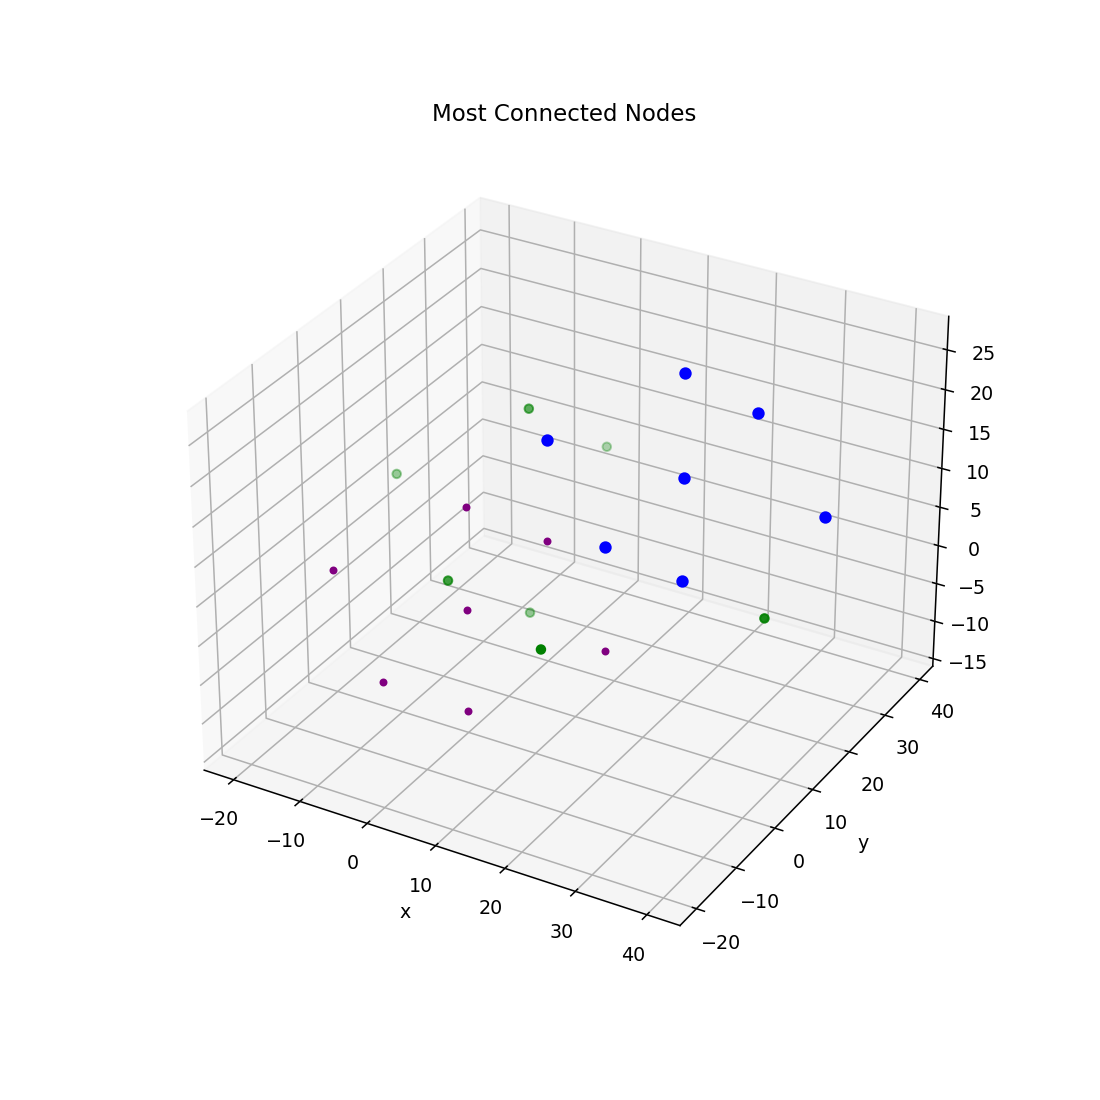

In [36]:
%matplotlib notebook
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

plt.title('Most Connected Nodes')
plt.xlabel('x')
plt.ylabel('y')

boxes = vector_pos + np.zeros((len(vector_pos),3))
k = 0
for point in boxes:
    point += box
    ax.scatter(point[0], point[1], point[2], s=30, c=colors[k])  
    ax.scatter(point[0]-box[0], point[1]-box[1], point[2]-box[2], s=10, c=colors[k+1])
# #     k += 1
#     ax.scatter(point[0] + box[0]*unit, point[1], point[2], s=20, c=colors[k])
# #     k += 1
#     ax.scatter(point[0], point[1] + box[1]*unit, point[2], s=20, c=colors[k])
# #     k += 1
#     ax.scatter(point[0], point[1], point[2] + box[2]*unit, s=20, c=colors[k])
# #     k += 1
#     ax.scatter(point[0] + box[0]*unit, point[1]+ box[1]*unit, point[2], s=20, c=colors[k])
# #     k += 1
#     ax.scatter(point[0], point[1] + box[1]*unit, point[2] + box[2]*unit, s=20, c=colors[k])
# #     k += 1
#     ax.scatter(point[0] + box[0]*unit, point[1] + box[1]*unit, point[2] + box[2]*unit, s=20, c=colors[k])
#     k += 1
ax.scatter(pagerank_nodes[:,0], pagerank_nodes[:,1], pagerank_nodes[:,2], s=20, c='green')

# for node in final.nodes:
    
#     ax.scatter(final.nodes[node]['coord'][0], final.nodes[node]['coord'][1], final.nodes[node]['coord'][2], 
#                s=1, c='black')

# ax.scatter(pagerank_nodes[:,0], pagerank_nodes[:,1], pagerank_nodes[:,2], s=20, c='green')
ax.figure.savefig('./result/most')

In [921]:
unit = (np.array(vector_pos[-1] )+ np.array(vector_pos[-4]))/np.linalg.norm(np.array(vector_pos[-1] )+ np.array(vector_pos[-4]))

In [893]:
vector_pos + box

array([[ 0.   ,  6.926,  6.41 ],
       [ 6.926,  0.   ,  6.41 ],
       [ 6.926,  6.926,  0.   ],
       [ 6.926,  6.926,  6.41 ],
       [ 6.926,  6.926, 12.82 ],
       [ 6.926, 13.852,  6.41 ],
       [13.852,  6.926,  6.41 ]])

In [ ]:
box2 = 

In [188]:
info[np.argsort(info)[-1:-8:-1]]
len(info)
node_list = sorted(list(final.nodes))
pagerank_nodes = np.zeros((7,3))
i = 0
for pos in np.argsort(info)[-1:-8:-1]:
#     print(node_list[pos])
    print(final.nodes[node_list[pos]]['coord'])
    pagerank_nodes[i,:] = final.nodes[node_list[pos]]['coord']
    i += 1

[ 3.463 -3.463  3.205]
[3.463 3.463 9.615]
[10.389  3.463  3.205]
[3.463 3.463 3.205]
[-3.463  3.463  3.205]
[ 3.463  3.463 -3.205]
[ 3.463 10.389  3.205]


In [189]:
pagerank_nodes

array([[ 3.463, -3.463,  3.205],
       [ 3.463,  3.463,  9.615],
       [10.389,  3.463,  3.205],
       [ 3.463,  3.463,  3.205],
       [-3.463,  3.463,  3.205],
       [ 3.463,  3.463, -3.205],
       [ 3.463, 10.389,  3.205]])

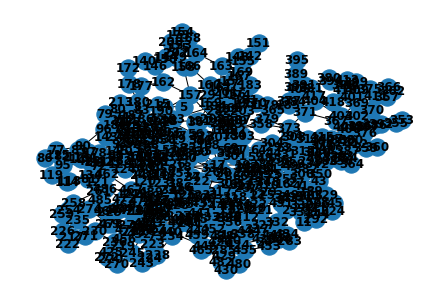

In [87]:
nx.draw(final, with_labels=True, font_weight='bold')

In [ ]:

for node in H.nodes:
    for attr in H.nodes[node]:
        G.nodes[node][attr] = H.nodes[node][attr]
        
for edge in H.edges:
    for attr in H.edges[edge[0], edge[1]]:
        G.edges[edge][attr] = H.edges[edge][attr]    

In [26]:
conx_cell = {}
x_1 = []
x_minus_1 = []
y_1 = []
y_minus_1 = []
z_1 = []
z_minus_1 = []
with open(path_nt2) as f:
    line = ' '

    while line:
        line = f.readline()
        
        if line == 'Edge table:\n':
            while line:

                line = f.readline()
                
                if line == '':
                    break
                    
                line_list = line.split()
                origin = int(line_list[0])
                destination = int(line_list[2])
                larger_radius = float(line_list[3])
                x_sim = int(line_list[4])
                y_sim = int(line_list[5])
                z_sim = int(line_list[6])
                if sum([abs(x_sim), abs(y_sim), abs(z_sim)]) == 0:
                    pass
                else:
                    if x_sim == 1:
                         x_1.append((origin,destination,larger_radius))
                    elif x_sim == -1:
                         x_minus_1.append((origin,destination,larger_radius))
                    elif y_sim == 1:
                         y_1.append((origin,destination,larger_radius))
                    elif y_sim == -1:
                         y_minus_1.append((origin,destination,larger_radius))
                    elif z_sim == 1:
                         z_1.append((origin,destination,larger_radius))
                    elif z_sim == -1:
                         z_minus_1.append((origin,destination,larger_radius))
                        
conx_cell['100'] = x_1
conx_cell['-100'] = x_minus_1
conx_cell['010'] = y_1
conx_cell['0-10'] = y_minus_1
conx_cell['001'] = z_1
conx_cell['00-1'] = z_minus_1

In [114]:
for key in conx_cell:
    print(len(conx_cell[key]))

10
10
10
10
13
13


In [112]:
x_minus_1

[(10, 3, 0.0922282),
 (14, 5, 0.0922282),
 (28, 56, 0.78061),
 (33, 58, 1.10205),
 (35, 57, 1.39808),
 (60, 65, 1.10205),
 (62, 66, 0.78061),
 (67, 67, 0.429155),
 (68, 68, 0.759739),
 (69, 69, 0.429154)]

In [22]:
L = nx.Graph()

In [25]:
L.add_edge(1,0)
L.edges[(1,0)]['weight'] = 5

In [72]:
L.edges

EdgeView([(1, 2)])

In [193]:
pagerank_nodes.shape

(7, 3)

In [74]:
L.add_edge(2,1, weight=0.6)

<IPython.core.display.Javascript object>


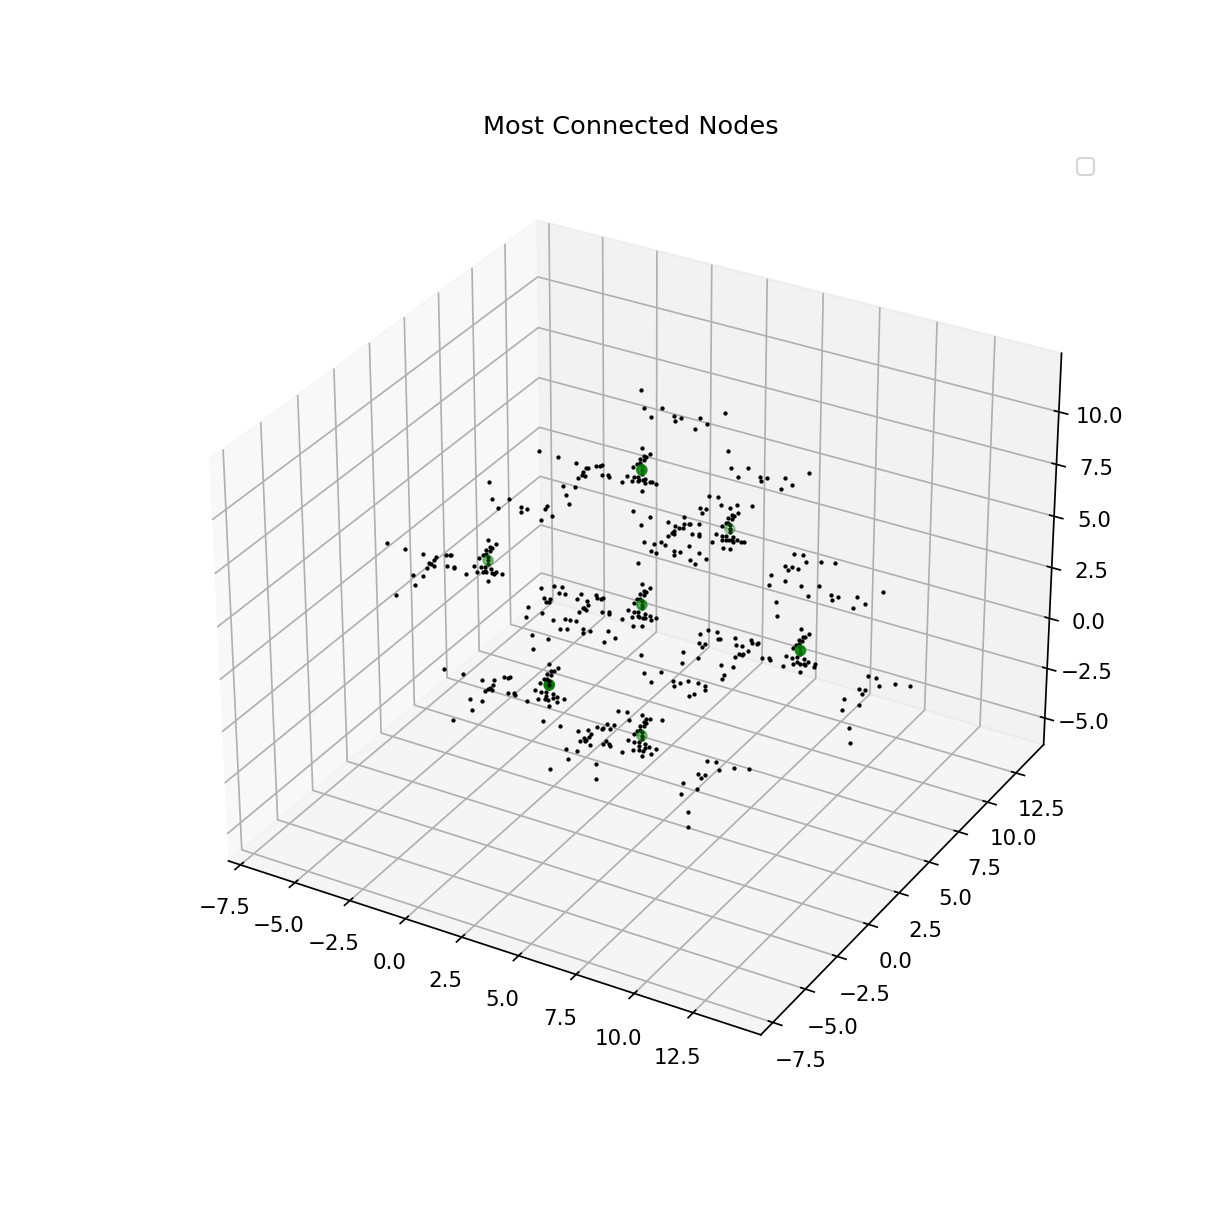

In [276]:
%matplotlib notebook
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

plt.title('Most Connected Nodes')
plt.legend(labels=[1,2])
# for node in final.nodes:
    
#     ax.scatter(final.nodes[node]['coord'][0], final.nodes[node]['coord'][1], final.nodes[node]['coord'][2], 
#                s=1, c='black')
ax.scatter(pagerank_nodes[:,0], pagerank_nodes[:,1], pagerank_nodes[:,2], s=20, c='green')    
for node in final.nodes:
    
    ax.scatter(final.nodes[node]['coord'][0], final.nodes[node]['coord'][1], final.nodes[node]['coord'][2], 
               s=1, c='black')

# ax.scatter(pagerank_nodes[:,0], pagerank_nodes[:,1], pagerank_nodes[:,2], s=20, c='green')
ax.figure.savefig('./result/most')

In [186]:
final.nodes[node]['coord']

array([3.31303, 3.463  , 2.62059])